In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os

base_path = "/content/drive/MyDrive/dataset"

# Images folders
os.makedirs(f"{base_path}/images/train", exist_ok=True)
os.makedirs(f"{base_path}/images/val", exist_ok=True)

# Labels folders
os.makedirs(f"{base_path}/labels/train", exist_ok=True)
os.makedirs(f"{base_path}/labels/val", exist_ok=True)

In [4]:
import shutil

src_images = "/content/drive/MyDrive/all_images"
src_labels = "/content/drive/MyDrive/all_labels"

train_img = f"{base_path}/images/train"
val_img = f"{base_path}/images/val"
train_lbl = f"{base_path}/labels/train"
val_lbl = f"{base_path}/labels/val"

# List files
images = sorted(os.listdir(src_images))
labels = sorted(os.listdir(src_labels))

# Training set (first 1000)
for i in range(1000):
    shutil.move(os.path.join(src_images, images[i]), train_img)
    shutil.move(os.path.join(src_labels, labels[i]), train_lbl)

# Validation set (remaining 300)
for i in range(1000, len(images)):
    shutil.move(os.path.join(src_images, images[i]), val_img)
    shutil.move(os.path.join(src_labels, labels[i]), val_lbl)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/all_images'

In [6]:
import os

src_images = '/content/drive/MyDrive/all_images'
src_labels = '/content/drive/MyDrive/all_labels'

if os.path.exists(src_images):
    print(f"Directory '{src_images}' exists.")
else:
    print(f"Directory '{src_images}' does not exist.")

if os.path.exists(src_labels):
    print(f"Directory '{src_labels}' exists.")
else:
    print(f"Directory '{src_labels}' does not exist.")

Directory '/content/drive/MyDrive/all_images' does not exist.
Directory '/content/drive/MyDrive/all_labels' does not exist.


In [7]:
print("Train images:", len(os.listdir(train_img)))
print("Val images:", len(os.listdir(val_img)))
print("Train labels:", len(os.listdir(train_lbl)))
print("Val labels:", len(os.listdir(val_lbl)))

Train images: 0
Val images: 0
Train labels: 0
Val labels: 0


In [8]:
base_path = "/content/project_data/dataset"

In [9]:
import os

# Images folders
os.makedirs(f"{base_path}/images/train", exist_ok=True)
os.makedirs(f"{base_path}/images/val", exist_ok=True)

# Labels folders
os.makedirs(f"{base_path}/labels/train", exist_ok=True)
os.makedirs(f"{base_path}/labels/val", exist_ok=True)

In [11]:
import shutil, os

src_images = "/content/drive/MyDrive/all_images"
src_labels = "/content/drive/MyDrive/all_labels"

train_img = f"{base_path}/images/train"
val_img = f"{base_path}/images/val"
train_lbl = f"{base_path}/labels/train"
val_lbl = f"{base_path}/labels/val"

images = sorted(os.listdir(src_images))
labels = sorted(os.listdir(src_labels))

# Training set (first 1000)
for i in range(1000):
    shutil.copy(os.path.join(src_images, images[i]), train_img)
    shutil.copy(os.path.join(src_labels, labels[i]), train_lbl)

# Validation set (remaining 300)
for i in range(1000, len(images)):
    shutil.copy(os.path.join(src_images, images[i]), val_img)
    shutil.copy(os.path.join(src_labels, labels[i]), val_lbl)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/all_images'

In [13]:
import os

# List contents of the root of MyDrive
drive_root_contents = os.listdir('/content/drive/MyDrive/')

print("Contents of /content/drive/MyDrive/:")
for item in drive_root_contents:
    print(item)

Contents of /content/drive/MyDrive/:
Colab Notebooks


In [14]:
print("Train images:", len(os.listdir(train_img)))
print("Val images:", len(os.listdir(val_img)))
print("Train labels:", len(os.listdir(train_lbl)))
print("Val labels:", len(os.listdir(val_lbl)))

Train images: 0
Val images: 0
Train labels: 0
Val labels: 0


In [15]:
!pip install ultralytics
from ultralytics import YOLO
import os
from google.colab import drive

# Drive connect karo
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 52.6 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import os
import glob
import yaml

print("🔍 Images dhundh raha hoon...")

# Hum pure Colab mein check karenge ki images kahan chupi hain
image_files = glob.glob("/content/**/train/**/*.jpg", recursive=True) + \
              glob.glob("/content/**/train/**/*.png", recursive=True) + \
              glob.glob("/content/**/train/**/*.jpeg", recursive=True)

if not image_files:
    print("❌ ERROR: Mujhe pure system mein kahin bhi training images nahi mili!")
    print("👉 Solution: Kya tumne zip file upload karke UNZIP ki thi? Step 2 phir se check karo.")
else:
    # Images mil gayi! Ab unka folder pata karte hain
    example_image = image_files[0]
    train_folder = os.path.dirname(example_image)

    # Validation folder ka path bhi nikalte hain (usually 'train' ke bagal mein hota hai)
    val_folder = train_folder.replace("train", "val")

    if not os.path.exists(val_folder):
        # Agar 'val' naam nahi hai, toh shayad 'valid' hoga
        val_folder = train_folder.replace("train", "valid")

    print(f"✅ Images yahan mili: {train_folder}")

    # Ab data.yaml ko sahi path ke saath update karte hain
    yaml_content = f"""
train: {train_folder}
val: {val_folder}

nc: 2
names: ['crop', 'weed']
"""

    with open("data.yaml", "w") as f:
        f.write(yaml_content)

    print("✅ 'data.yaml' file update ho gayi hai!")
    print("🚀 Ab tum Training wala cell dubara run kar sakte ho.")

🔍 Images dhundh raha hoon...
❌ ERROR: Mujhe pure system mein kahin bhi training images nahi mili!
👉 Solution: Kya tumne zip file upload karke UNZIP ki thi? Step 2 phir se check karo.


In [22]:
import os
import shutil
import random
import glob
from google.colab import drive

# 1. Google Drive Mount karo
print("📂 Google Drive connect kar raha hoon...")
drive.mount('/content/drive')

# 2. Zip File Dhundho
print("🔍 Zip file dhoondh raha hoon...")
zip_files = glob.glob("/content/drive/MyDrive/*.zip")

if not zip_files:
    print("❌ ERROR: Drive mein koi .zip file nahi mili! Check karo file upload hui hai ya nahi.")
else:
    zip_path = zip_files[0] # Pehli zip file le li
    print(f"✅ Zip file mil gayi: {zip_path}")

    # 3. Purana data safai (Clean Slate)
    base_dir = "/content/final_dataset"
    if os.path.exists(base_dir):
        shutil.rmtree(base_dir)

    # 4. Folders banao (YOLO Structure)
    os.makedirs(f"{base_dir}/images/train", exist_ok=True)
    os.makedirs(f"{base_dir}/images/val", exist_ok=True)
    os.makedirs(f"{base_dir}/labels/train", exist_ok=True)
    os.makedirs(f"{base_dir}/labels/val", exist_ok=True)

    # 5. Zip Extract karo (Temporary folder mein)
    print("⏳ Zip khol raha hoon (Unzipping)...")
    temp_dir = "/content/temp_extract"
    !unzip -q "{zip_path}" -d "{temp_dir}"

    # 6. Files ko sort aur move karo
    print("🚀 Files ko Train aur Val folders mein bhej raha hoon...")

    # Saari images dhoondho (jpg, jpeg, png)
    all_images = glob.glob(f"{temp_dir}/**/*.jpg", recursive=True) + \
                 glob.glob(f"{temp_dir}/**/*.jpeg", recursive=True) + \
                 glob.glob(f"{temp_dir}/**/*.png", recursive=True)

    # Shuffle karo taaki random data mile
    random.shuffle(all_images)

    # 80% Training, 20% Validation
    split_index = int(len(all_images) * 0.8)
    train_imgs = all_images[:split_index]
    val_imgs = all_images[split_index:]

    def move_files(file_list, split_name):
        count = 0
        for img_path in file_list:
            # Image ka naam nikalo
            filename = os.path.basename(img_path)
            name_no_ext = os.path.splitext(filename)[0]

            # Corresponding Text file dhoondho
            parent_folder = os.path.dirname(img_path)
            txt_path = os.path.join(parent_folder, name_no_ext + ".txt")

            # Agar Text file maujood hai tabhi move karo
            if os.path.exists(txt_path):
                # Image move karo
                shutil.move(img_path, f"{base_dir}/images/{split_name}/{filename}")
                # Text file move karo
                shutil.move(txt_path, f"{base_dir}/labels/{split_name}/{name_no_ext}.txt")
                count += 1
        return count

    train_count = move_files(train_imgs, "train")
    val_count = move_files(val_imgs, "val")

    print(f"🎉 SUCCESS! Data Ready hai.")
    print(f"📈 Training Images: {train_count}")
    print(f"🧪 Validation Images: {val_count}")

    # 7. data.yaml file banao
    yaml_content = f"""
train: {base_dir}/images/train
val: {base_dir}/images/val

nc: 2
names: ['crop', 'weed']
"""
    with open("data.yaml", "w") as f:
        f.write(yaml_content)
    print("✅ 'data.yaml' file bhi ban gayi!")

📂 Google Drive connect kar raha hoon...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🔍 Zip file dhoondh raha hoon...
✅ Zip file mil gayi: /content/drive/MyDrive/project_data.zip.zip
⏳ Zip khol raha hoon (Unzipping)...
🚀 Files ko Train aur Val folders mein bhej raha hoon...
🎉 SUCCESS! Data Ready hai.
📈 Training Images: 1040
🧪 Validation Images: 260
✅ 'data.yaml' file bhi ban gayi!


In [23]:
from ultralytics import YOLO

# Model load karo
model = YOLO("yolov8n.pt")

# Training shuru (Ab ye chalega!)
# Hum 25 epochs (round) ke liye train karenge
print("🔥 Training Shuru ho rahi hai...")
model.train(data="data.yaml", epochs=25, imgsz=512)

🔥 Training Shuru ho rahi hai...
Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x794cfb9371d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

📂 Result folder mila: /content/runs/detect/predict2
🎉 Photo mil gayi: /content/runs/detect/predict2/agri_0_3736.jpg
👇 Ye raha tumhara Final Output (Box dekho!):


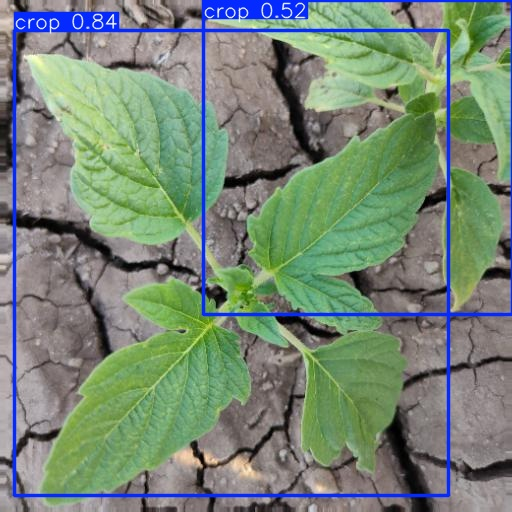

In [28]:
import os
import glob
from IPython.display import Image, display

# 1. Latest Predict folder dhoondho (jahan result save hua)
# Hum 'predict' se shuru hone wale saare folders check karenge
all_predict_folders = glob.glob('/content/runs/detect/predict*')
latest_folder = max(all_predict_folders, key=os.path.getmtime)

print(f"📂 Result folder mila: {latest_folder}")

# 2. Folder ke andar files check karo
files_inside = os.listdir(latest_folder)

# 3. Image dhoondho (Extension ki tension mat lo)
found_image = None
for file in files_inside:
    if file.lower().endswith(('.jpg', '.jpeg', '.png')):
        found_image = os.path.join(latest_folder, file)
        break

if found_image:
    print(f"🎉 Photo mil gayi: {found_image}")
    print("👇 Ye raha tumhara Final Output (Box dekho!):")
    display(Image(filename=found_image))
else:
    print("❌ Abhi bhi file nahi mili. Folder khali lag raha hai.")

In [29]:
from google.colab import files

# Saare results (Graphs, Confusion Matrix, Prediction) ko ek Zip mein pack karo
!zip -r my_project_results.zip /content/runs/detect

# Download karo
files.download('my_project_results.zip')


  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train3/ (stored 0%)
  adding: content/runs/detect/train3/confusion_matrix_normalized.png (deflated 29%)
  adding: content/runs/detect/train3/train_batch976.jpg (deflated 5%)
  adding: content/runs/detect/train3/train_batch0.jpg (deflated 1%)
  adding: content/runs/detect/train3/val_batch1_pred.jpg (deflated 5%)
  adding: content/runs/detect/train3/weights/ (stored 0%)
  adding: content/runs/detect/train3/weights/last.pt (deflated 9%)
  adding: content/runs/detect/train3/weights/best.pt (deflated 9%)
  adding: content/runs/detect/train3/val_batch0_pred.jpg (deflated 5%)
  adding: content/runs/detect/train3/val_batch1_labels.jpg (deflated 5%)
  adding: content/runs/detect/train3/confusion_matrix.png (deflated 32%)
  adding: content/runs/detect/train3/results.csv (deflated 60%)
  adding: content/runs/detect/train3/train_batch2.jpg (deflated 1%)
  adding: content/runs/detect/train3/BoxF1_curve.png (deflated 12%)
  add

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>